# 20240223 

Sarah Fong

- Goal: Call differential accessibility peak using diffbind

- helpful websites
    - tutorial:  
        - https://hbctraining.github.io/Intro-to-ChIPseq/lessons/08_diffbind_differential_peaks.html
    
    - bioconductor manual and tutorial is here:
        - https://bioconductor.org/packages/release/bioc/vignettes/DiffBind/inst/doc/DiffBind.pdf
        - https://bioconductor.org/packages/release/bioc/manuals/DiffBind/man/DiffBind.pdf  # reference manual

- for setting up wynton login and tunneling to jupyter notebooks
    - https://github.com/slifong08/tools/blob/main/jupyter_tutorials/conda_jupyter_on_wynton.ipynb

# download software

In [ ]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

# install diffbind from BioConductor. 
if (!require("DiffBind", quietly = TRUE))
    BiocManager::install("DiffBind")

if (!require("tidyverse", quietly = TRUE))
    install.packages("tidyverse")


# load software

In [1]:
# load diffbind
library(DiffBind)

library(tidyverse)

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomeInfoDb

Loa

# load the data


In [ ]:
# Set your working directory
setwd("/wynton/group/ahituv/data/US-MPRA/ChIP-seq_H3k27ac")  # change 

sample_csv = "samples_hepg2_chip.csv"  # change
samples <- read.csv(sample_csv)


samples

# make diffbind object from samples sheet

In [7]:
obj = dba(config=NULL, sampleSheet=sample_csv)  # if you want to change threshold, set th=0.xx here. 

HEPG2-C1 HEPG2 control   1 narrow

HEPG2-C2 HEPG2 control   2 narrow

HEPG2-C3 HEPG2 control   3 narrow

HEPG2-T1 HEPG2 treatment   1 narrow

HEPG2-T2 HEPG2 treatment   2 narrow

HEPG2-T3 HEPG2 treatment   3 narrow



In [8]:
obj

6 Samples, 31723 sites in matrix (41338 total):
        ID Tissue    Factor Replicate Intervals
1 HEPG2-C1  HEPG2   control         1     30715
2 HEPG2-C2  HEPG2   control         2     35948
3 HEPG2-C3  HEPG2   control         3     33817
4 HEPG2-T1  HEPG2 treatment         1     35956
5 HEPG2-T2  HEPG2 treatment         2     34341
6 HEPG2-T3  HEPG2 treatment         3     31338

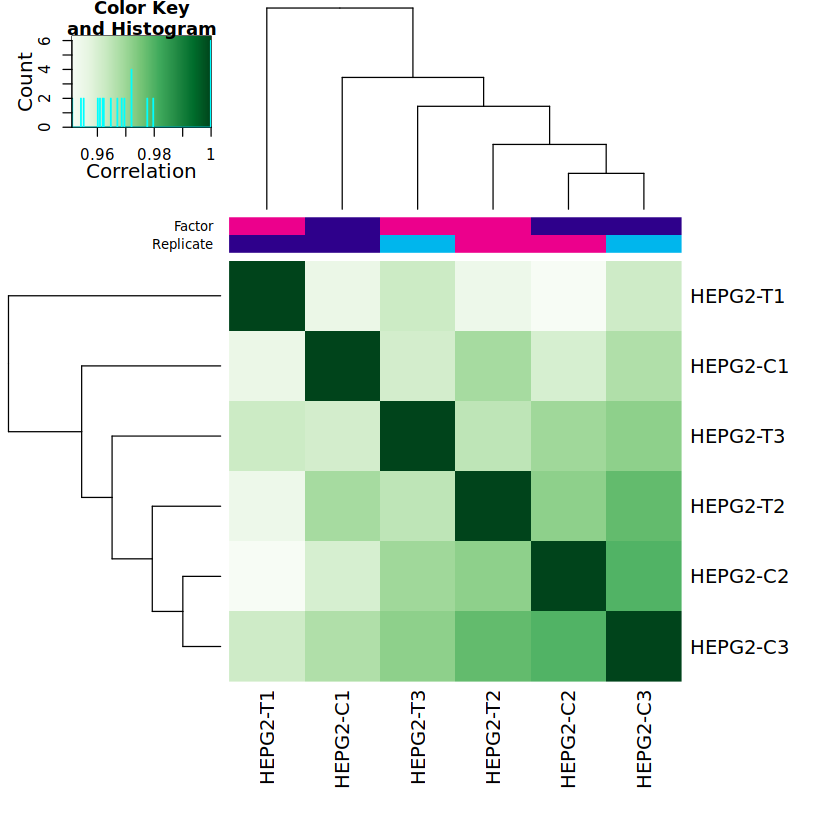

In [9]:
plot(obj)  # visualize correlation between samples, replicates, treatments

# run count function

In [12]:
obj<- dba.count(obj,  
                #bUseSummarizeOverlaps=TRUE
               )  # returns normalized count matrix  
                    # set summit here. 

Computing summits...

Re-centering peaks...



In [11]:
obj

6 Samples, 31723 sites in matrix (41338 total):
        ID Tissue    Factor Replicate Intervals
1 HEPG2-C1  HEPG2   control         1     30715
2 HEPG2-C2  HEPG2   control         2     35948
3 HEPG2-C3  HEPG2   control         3     33817
4 HEPG2-T1  HEPG2 treatment         1     35956
5 HEPG2-T2  HEPG2 treatment         2     34341
6 HEPG2-T3  HEPG2 treatment         3     31338

# set contrast as control elements
- categories can be one of DBA_TISSUE,DBA_FACTOR,DBA_CONDITION,DBA_TREATMENT

In [13]:
obj <- dba.contrast(obj, categories=DBA_FACTOR, minMembers = 2)

Computing results names...



In [14]:
obj

6 Samples, 30886 sites in matrix:
        ID Tissue    Factor Replicate    Reads FRiP
1 HEPG2-C1  HEPG2   control         1 17011702 0.09
2 HEPG2-C2  HEPG2   control         2 19169809 0.14
3 HEPG2-C3  HEPG2   control         3 21862188 0.13
4 HEPG2-T1  HEPG2 treatment         1 13502763 0.14
5 HEPG2-T2  HEPG2 treatment         2 22634031 0.12
6 HEPG2-T3  HEPG2 treatment         3 14477715 0.11

Design: [~Factor] | 1 Contrast:
  Factor     Group Samples  Group2 Samples2
1 Factor treatment       3 control        3

# analyze differentially accessible elements

In [17]:
obj <- dba.analyze(obj, method=DBA_DESEQ2)

Analyzing...

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



## review report of the diff.accessible run

In [27]:
res_deseq <- dba.report(obj, method=DBA_DESEQ2, contrast = 1, th=1)

In [28]:
res_deseq

GRanges object with 30860 ranges and 6 metadata columns:
        seqnames              ranges strand |      Conc Conc_treatment
           <Rle>           <IRanges>  <Rle> | <numeric>      <numeric>
  28810     chr9   21084491-21084891      * |   5.47915        4.90217
  27130     chr7 116953307-116953707      * |   6.01820        5.61062
  28519     chr8 133559421-133559821      * |   5.68338        5.24155
  10324    chr16     4271882-4272282      * |   5.30383        5.67410
  30738     chrX 136130676-136131076      * |   4.25108        4.71488
    ...      ...                 ...    ... .       ...            ...
  27242     chr7 134992138-134992538      * |   7.80388        7.80521
  18374    chr20   49219234-49219634      * |   5.95181        5.94871
  27964     chr8   55988656-55989056      * |   4.18815        4.18050
  27196     chr7 130486357-130486757      * |   4.30821        4.33032
   7974    chr13   98199992-98200392      * |   5.44465        5.44210
        Conc_control

## write report

In [29]:
out <- as.data.frame(res_deseq)
write.table(out, file="Diffbind_report_deseq2.txt", sep="\t", quote=F, row.names=F)



# write bed files# Create bed files for each keeping only significant peaks (p < 0.05)

In [ ]:
bed <- out %>% 
  filter(FDR < 0.05 & Fold > 0) %>%  ## change? 
  select(seqnames, start, end)
  

In [ ]:
# Write to file
write.table(bed, file="DiffAcc_enriched.bed", sep="\t", quote=F, row.names=F, col.names=F)